In [92]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns 
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('diabetes.csv', header=0)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [95]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [96]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [97]:
print("Number of 0's for Glucose:", df['Glucose'].isin([0]).sum())
print("Number of 0's for Blood Pressure:", df['BloodPressure'].isin([0]).sum())
print("Number of 0's for Skin Thickness:", df['SkinThickness'].isin([0]).sum())
print("Number of 0's for Insulin:", df['Insulin'].isin([0]).sum())
print("Number of 0's for BMI:", df['BMI'].isin([0]).sum())

Number of 0's for Glucose: 5
Number of 0's for Blood Pressure: 35
Number of 0's for Skin Thickness: 227
Number of 0's for Insulin: 374
Number of 0's for BMI: 11


In [98]:
df_clean = df.copy()

In [99]:
df_clean['Glucose'] = df_clean['Glucose'].replace(0,df['Glucose'].mean())
df_clean['BloodPressure'] = df_clean['BloodPressure'].replace(0,df['BloodPressure'].mean())
df_clean['SkinThickness'] = df_clean['SkinThickness'].replace(0,df['SkinThickness'].mean())
df_clean['Insulin'] = df_clean['Insulin'].replace(0,df['Insulin'].mean())
df_clean['BMI'] = df_clean['BMI'].replace(0,df['BMI'].mean())

In [100]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [101]:
df_clean.to_csv('diabetes_clean.csv')

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
Insulin                     -0.018082  0.396597       0.010926       0.240361   
BMI                          0.021546  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018082  0.021546                 -0.033523   
Glucose                   0.396597  0.231

<Axes: >

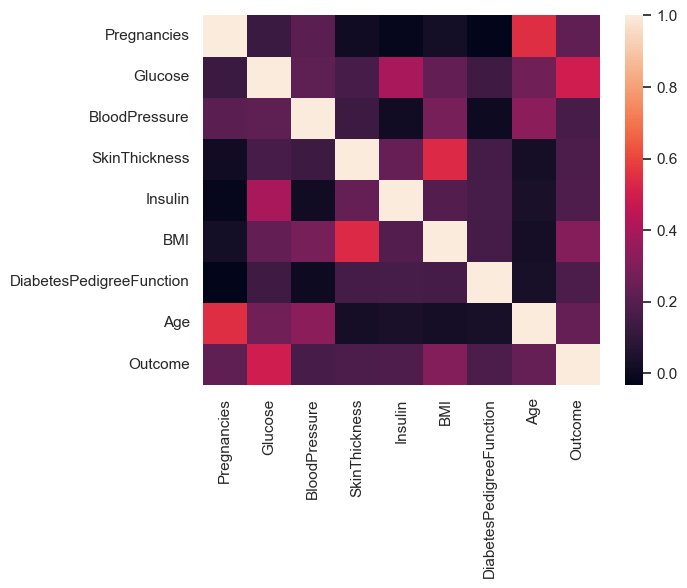

In [102]:
corr = df_clean.corr()
print(corr)
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns)

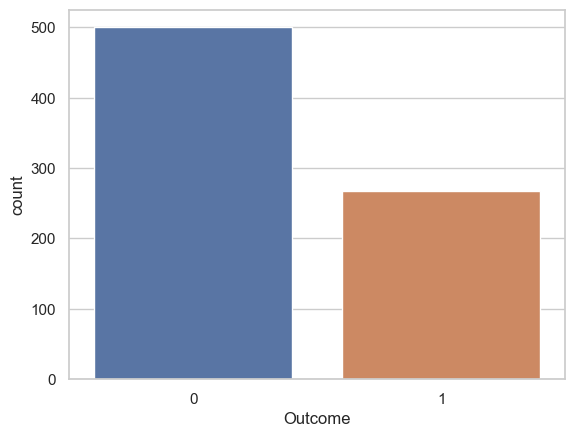

In [103]:
sns.countplot(data = df_clean, x = 'Outcome');

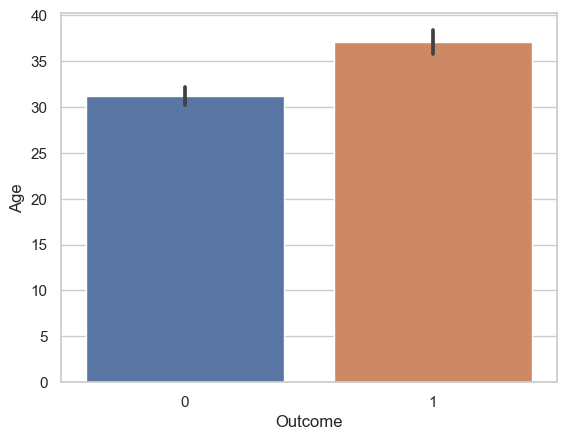

In [104]:
sns.barplot(data = df_clean, x = 'Outcome', y = 'Age');

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


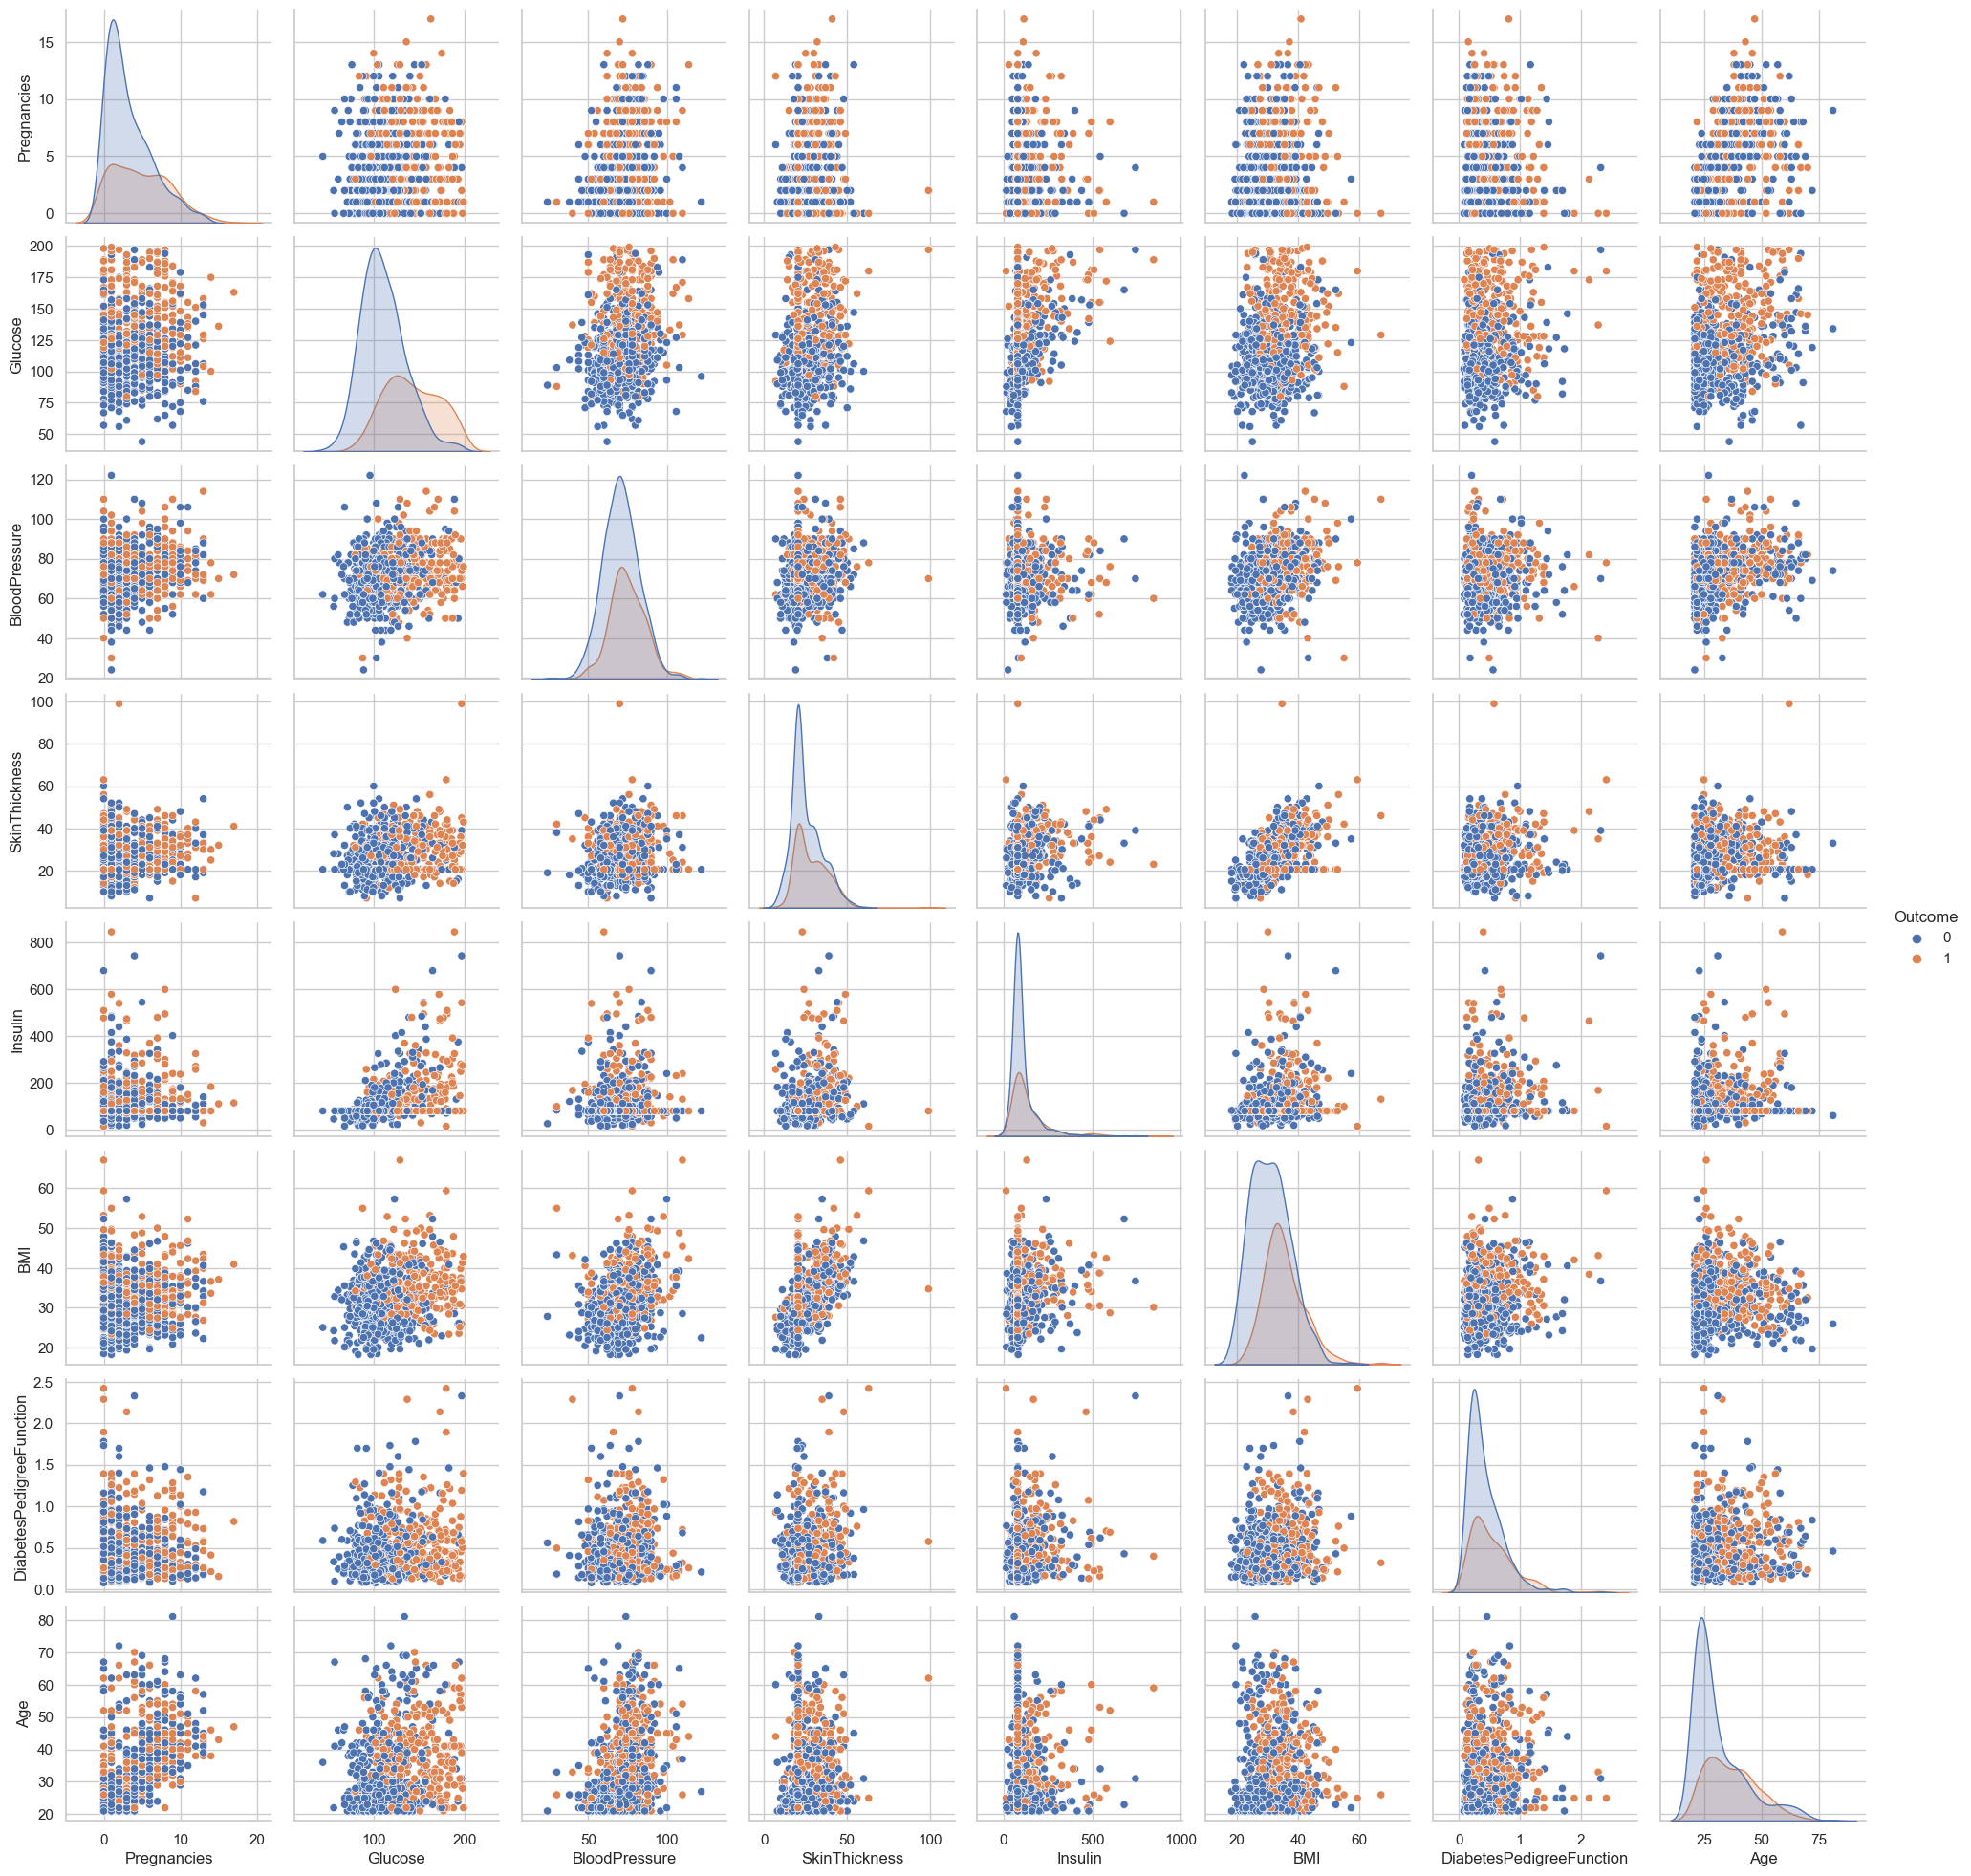

In [105]:
sns.pairplot(df_clean, diag_kind='kde', hue='Outcome')

<Axes: xlabel='Age', ylabel='BMI'>

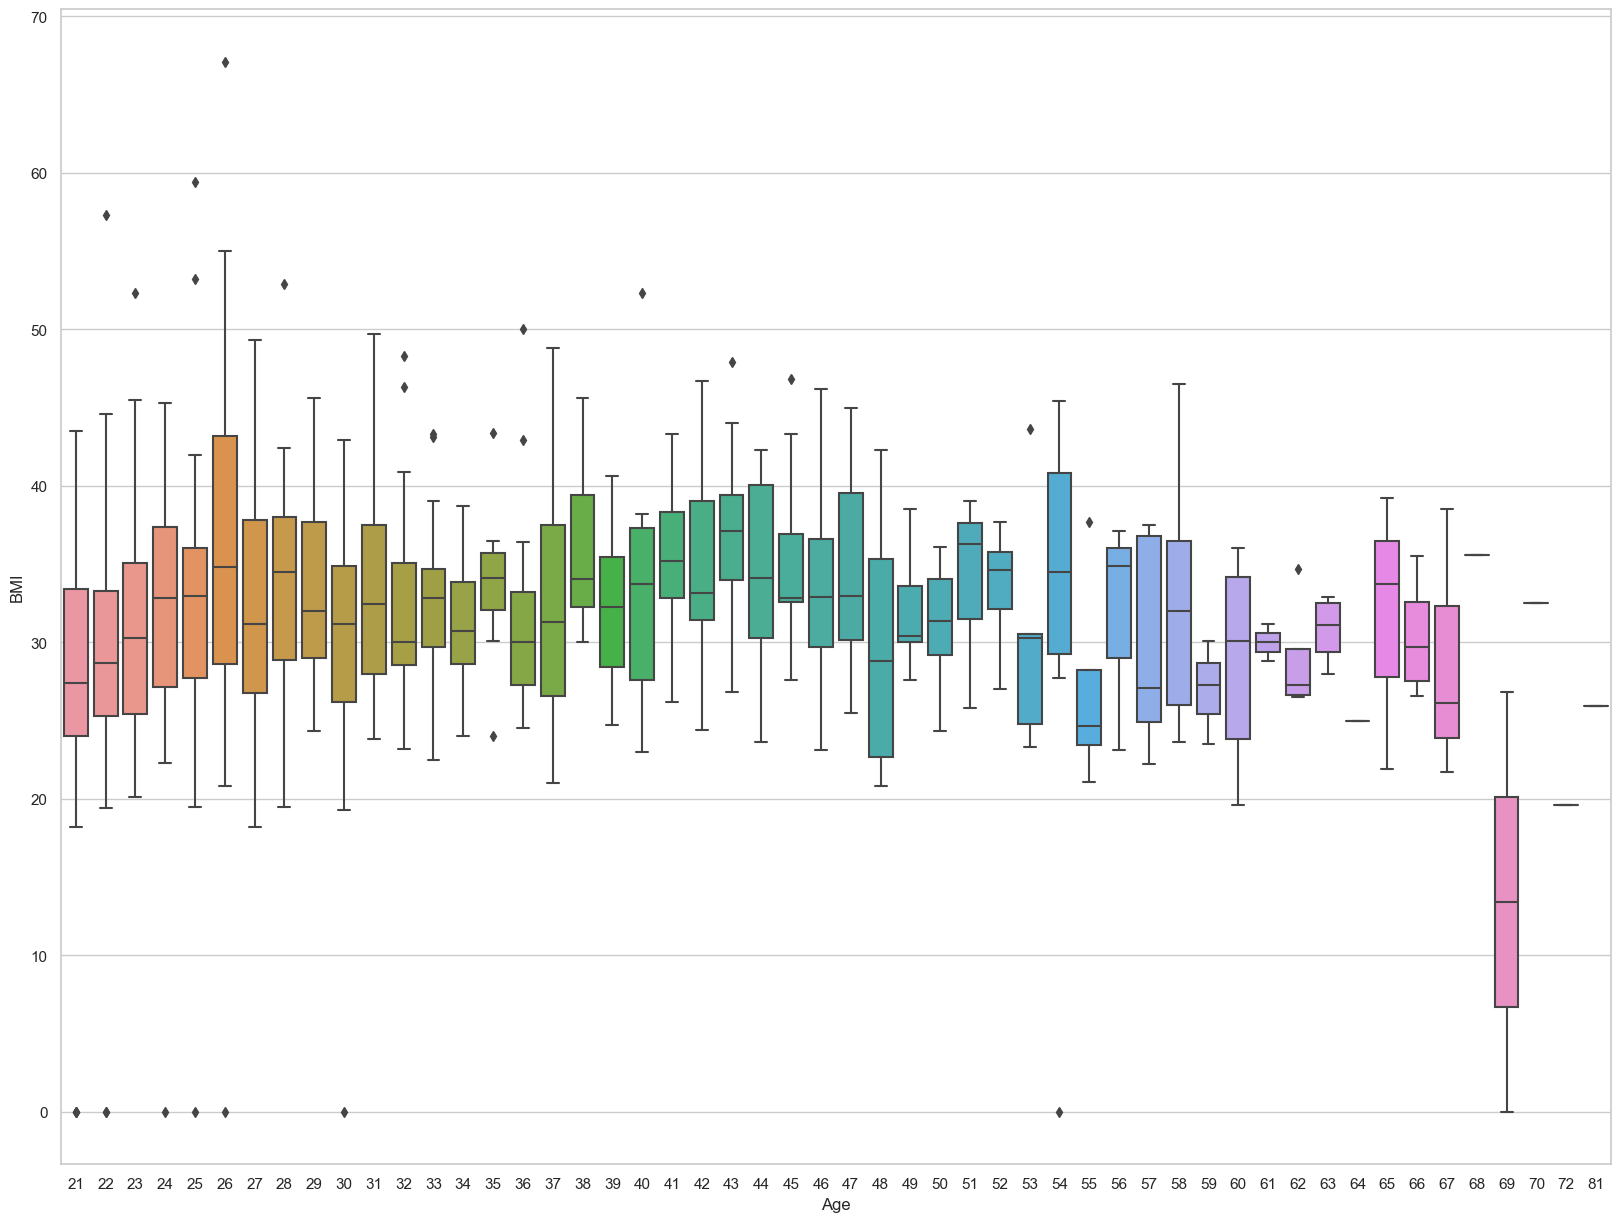

In [106]:
plt.subplots(figsize=(20,15))
sns.boxplot(x='Age', y='BMI', data=df)

In [107]:
x = df_clean.drop('Outcome',axis=1)
y = df_clean['Outcome']

In [108]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [109]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

prediction =model.predict(x_test)
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       0.80      0.83      0.81       103
           1       0.62      0.59      0.61        51

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
y_prob = model.predict_proba(x_test)[:,1]

df_prob = pd.DataFrame({'Actual:':y_test, 'Probability':y_prob})

df_prob = df_prob.sort_values(by='Probability')
accuracy = accuracy_score(y_test, prediction)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_prob)), df_prob['Probability'], color='r', marker='.')
plt.plot(range(len(df_prob)), df_prob['Probability'], color='b', linewidth=3)
plt.axhline(y=accuracy, color='orange', linestyle='--', label=f'Accuracy: {accuracy:.2f}')
plt.xlabel('Index')
plt.ylabel('Probability')
plt.title('Logistic Regression Curve')
plt.show()

NameError: name 'accuracy_score' is not defined

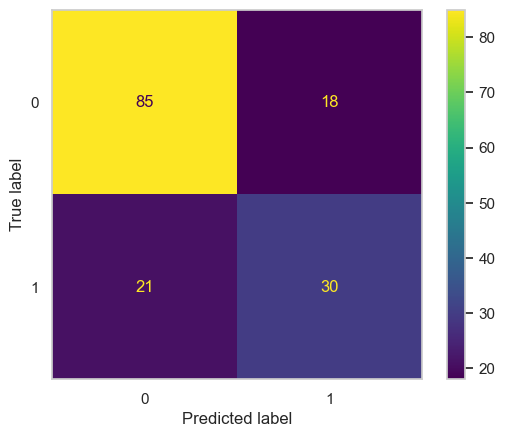

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix(y_test,prediction)


cm = confusion_matrix(y_test, prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=model.classes_)
disp.plot()
plt.grid(False)
plt.show()